<a href="https://colab.research.google.com/github/agustinsilva447/Fisica-de-los-Semiconductores/blob/main/7_extrinsic_equilibrium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Nd = 10
Na = 1
Ev = 0.2
Ea = 0.3
Ed = 0.7
Ec = 0.8
Ef = np.linspace(0, 1, 1000)
k = 0.00008617333262

In [3]:
T = 300
n0 = (T**1.5)/(300**1.5)
p0 = (T**1.5)/(300**1.5)

n = n0 * np.e ** ((Ef - Ec)/(k*T))
p = p0 * np.e ** ((Ev - Ef)/(k*T))
nd = Nd / (1 + np.e**((Ef - Ed)/(k*T)))
na = Na / (1 + np.e**((Ea - Ef)/(k*T)))

Energía de Fermi = 0.7517517517517518


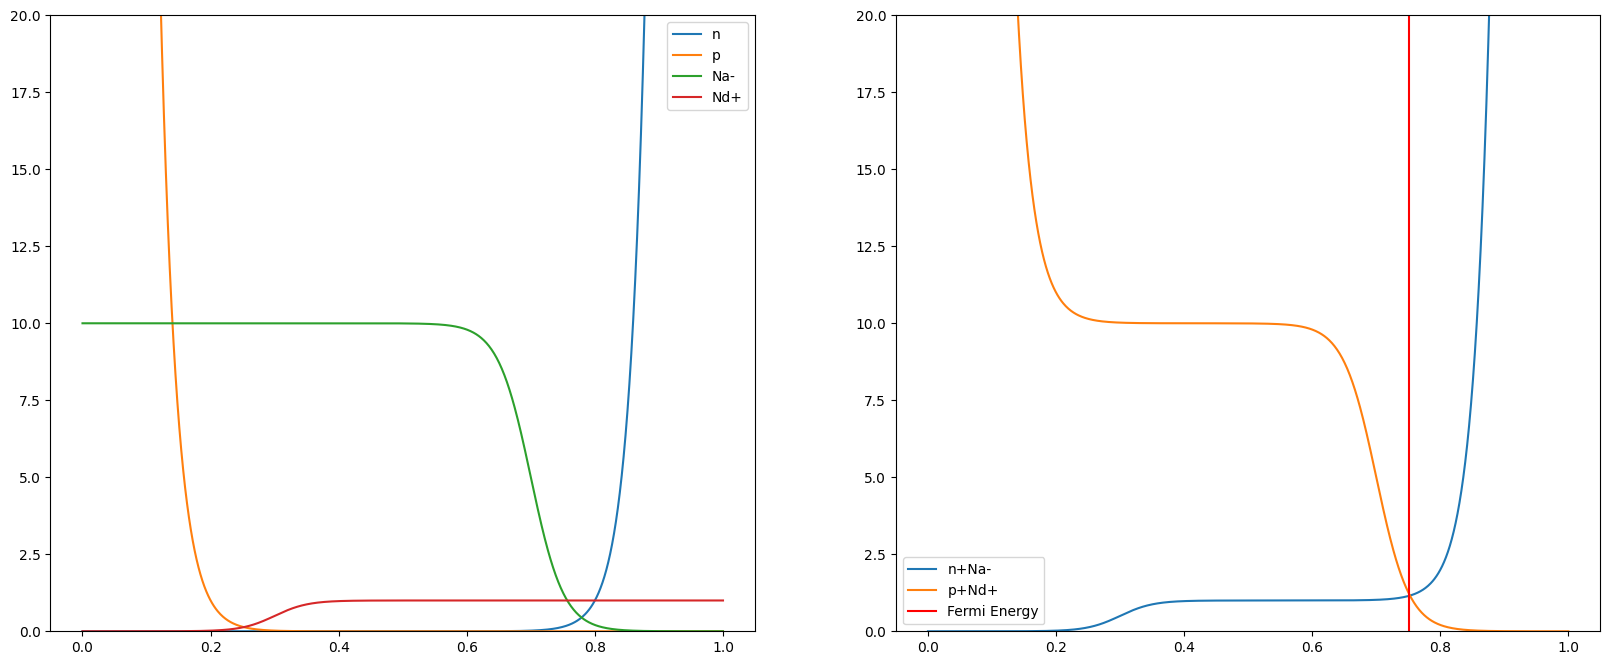

In [4]:
idx = np.argwhere(np.diff(np.sign(n+na-p-nd))).flatten()
Ef_eq = Ef[idx][0]
print("Energía de Fermi =", Ef_eq)

fig0, axs = plt.subplots(1,2,figsize=(20,8))
axs[0].plot(Ef,n,label = "n")
axs[0].plot(Ef,p,label = "p")
axs[0].plot(Ef,nd,label = "Na-")
axs[0].plot(Ef,na,label = "Nd+")
axs[1].plot(Ef,n+na, label = "n+Na-")
axs[1].plot(Ef,p+nd, label = "p+Nd+")
axs[1].axvline(x = Ef[idx][0], color = 'r', label = 'Fermi Energy')
axs[0].legend()
axs[1].legend()
axs[0].set_ylim(0, 2 * np.max([Nd, Na, (n+na)[idx][0]]))
axs[1].set_ylim(0, 2 * np.max([Nd, Na, (n+na)[idx][0]]))
plt.show()

In [5]:
### Extra

In [6]:
T_range = np.linspace(5, 10000, 5000)

Ef_list = []
for T in T_range:
  n0 = (T**1.5)/(300**1.5)
  p0 = (T**1.5)/(300**1.5)
  n = n0 * np.e ** ((Ef - Ec)/(k*T))
  p = p0 * np.e ** ((Ev - Ef)/(k*T))
  nd = Nd / (1 + np.e**((Ef - Ed)/(k*T)))
  na = Na / (1 + np.e**((Ea - Ef)/(k*T)))
  idx = np.argwhere(np.diff(np.sign(n+na-p-nd))).flatten()
  Ef_list.append(Ef[idx][0])

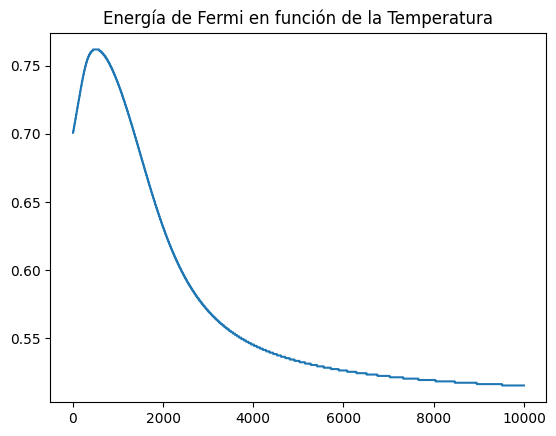

In [7]:
plt.title("Energía de Fermi en función de la Temperatura")
plt.plot(T_range, Ef_list)
plt.show()